# Project Introduction: Sentiment Analysis on Amazon Product Reviews

In this project, we analyze Amazon product reviews to determine whether they convey positive or negative sentiments. Sentiment analysis is a crucial tool for businesses seeking to understand customer feedback and make data-driven decisions. We will follow a structured approach that includes data preprocessing, sentiment analysis using NLTK's VADER tool, feature extraction using TF-IDF, and machine learning with a Random Forest Classifier. Our goal is to build an effective model for sentiment classification, enabling us to gain valuable insights from customer reviews.

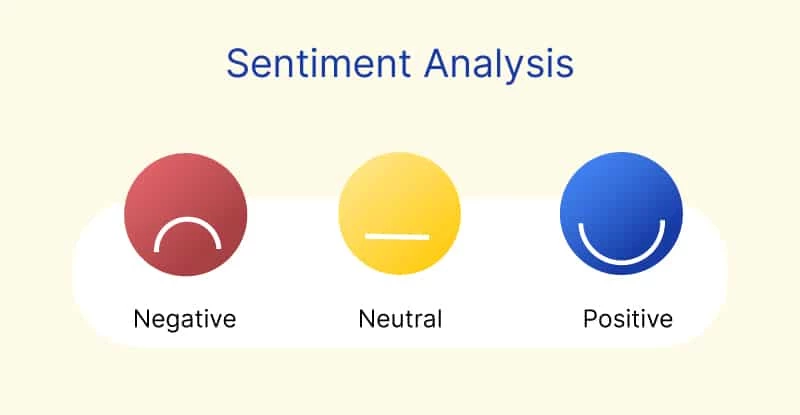

In [ ]:
import os
import numpy as np
import pandas as pd

import nltk
from nltk import corpus,tokenize
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer,WordNetLemmatizer,porter

nltk.download("punkt")
nltk.download("vader_lexicon")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [ ]:
abc="This is a good movie ever seen"

In [ ]:
sia.polarity_scores(abc)

{'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.4404}

In [ ]:
abc="This is a worst movie film to ever disgrace the screen"
sia.polarity_scores(abc)

{'neg': 0.477, 'neu': 0.523, 'pos': 0.0, 'compound': -0.8074}

In [ ]:
df=pd.read_csv("/content/AmazonProductReviewsData.tsv",sep='\t')

In [ ]:
df.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [ ]:
sia.polarity_scores(df.loc[0]['review'])

{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'compound': 0.9454}

In [ ]:
df.loc[0]['review']

'Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'

In [ ]:
df.shape

(10000, 2)

In [ ]:
df.isnull().sum()

label     0
review    0
dtype: int64

In [ ]:
df['scores']=df['review'].apply(lambda review :sia.polarity_scores(review))

In [ ]:
df.head(10)

,label,review,scores
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co..."
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co..."
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com..."
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com..."
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp..."
5,pos,an absolute masterpiece: I am quite sure any o...,"{'neg': 0.014, 'neu': 0.737, 'pos': 0.249, 'co..."
6,neg,"Buyer beware: This is a self-published book, a...","{'neg': 0.124, 'neu': 0.806, 'pos': 0.069, 'co..."
7,pos,Glorious story: I loved Whisper of the wicked ...,"{'neg': 0.072, 'neu': 0.583, 'pos': 0.346, 'co..."
8,pos,A FIVE STAR BOOK: I just finished reading Whis...,"{'neg': 0.113, 'neu': 0.712, 'pos': 0.174, 'co..."
9,pos,Whispers of the Wicked Saints: This was a easy...,"{'neg': 0.033, 'neu': 0.777, 'pos': 0.19, 'com..."


In [ ]:
len(df['scores'])

10000

In [ ]:
df['compound']=df['scores'].apply(lambda score_dict : score_dict['compound'])
df.head()

,label,review,scores,compound
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781


In [ ]:
df['comp_score']=df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
df.head(10)

,label,review,scores,compound,comp_score
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454,pos
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957,pos
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858,pos
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814,pos
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781,pos
5,pos,an absolute masterpiece: I am quite sure any o...,"{'neg': 0.014, 'neu': 0.737, 'pos': 0.249, 'co...",0.9900,pos
6,neg,"Buyer beware: This is a self-published book, a...","{'neg': 0.124, 'neu': 0.806, 'pos': 0.069, 'co...",-0.8744,neg
7,pos,Glorious story: I loved Whisper of the wicked ...,"{'neg': 0.072, 'neu': 0.583, 'pos': 0.346, 'co...",0.9900,pos
8,pos,A FIVE STAR BOOK: I just finished reading Whis...,"{'neg': 0.113, 'neu': 0.712, 'pos': 0.174, 'co...",0.8353,pos
9,pos,Whispers of the Wicked Saints: This was a easy...,"{'neg': 0.033, 'neu': 0.777, 'pos': 0.19, 'com...",0.8196,pos


# Evaluation Matrix

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
print(confusion_matrix(df['label'],df['comp_score']))
print("******************10")
print(classification_report(df['label'],df['comp_score']))
print("******************10")
print(accuracy_score(df['label'],df['comp_score']))


[[2629 2468]
 [ 435 4468]]
******************10
              precision    recall  f1-score   support

         neg       0.86      0.52      0.64      5097
         pos       0.64      0.91      0.75      4903

    accuracy                           0.71     10000
   macro avg       0.75      0.71      0.70     10000
weighted avg       0.75      0.71      0.70     10000

******************10
0.7097


# Building Machine Learning Approach




In [ ]:
df=pd.read_csv("/content/AmazonProductReviewsData.tsv",sep='\t')

In [ ]:
df.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [ ]:
from tqdm import tqdm

In [ ]:

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
preprocessed_reviews=[]

for sentence in tqdm(df['review'].values):
  sentence = re.sub('[^a-zA-Z]',' ',sentence)
  sentence= ' '.join(low.lower() for low in sentence.split() if low.lower() not in stopwords.words('english'))
  preprocessed_reviews.append(sentence.strip())

100%|██████████| 10000/10000 [01:33<00:00, 107.38it/s]


In [ ]:
df['review'].values

array(['Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^',
       "The best soundtrack ever to anything.: I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny.",
       'Amazing!: This soundtrack is my fav

In [ ]:
# Feature Extraction

TF-IDF :Term frequency -inverse document Frequency

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
x =tfidf.fit_transform(preprocessed_reviews).toarray()
pd.DataFrame(x).shape


(10000, 30543)

In [ ]:
df['label'] =df['label'].astype('category')
df['label'] =df['label'].cat.codes

In [ ]:
df['label'].value_counts()

0    5097
1    4903
Name: label, dtype: int64

In [ ]:
# split the data into training and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,df['label'],test_size=0.25,random_state=0)

In [ ]:
# Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_train=rf.predict(x_train)
y_pred_test =rf.predict(x_test)

In [ ]:
print("Training_accuracy:",accuracy_score(y_train,y_pred_train))

Training_accuracy: 1.0


In [ ]:
print("Testing_accuracy:",accuracy_score(y_test,y_pred_test))

Testing_accuracy: 0.8456


In [ ]:
# cross validation method
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(rf,x_train,y_train,cv=5)
training_accuracy.mean()

0.8290666666666666

In [ ]:
# cross validation method
from sklearn.model_selection import cross_val_score
testing_accuracy = cross_val_score(rf,x_test,y_test,cv=5)
testing_accuracy.mean()

0.8092

# Project Conclusion: Sentiment Analysis on Amazon Product Reviews

In this project, we embarked on a journey to analyze Amazon product reviews and uncover their underlying sentiments. The primary aim was to determine whether these reviews expressed positive or negative opinions about the products. Here's a detailed summary of what we accomplished and the insights we gained:

**1. Data Acquisition and Exploration:**
We started by obtaining a dataset containing Amazon product reviews. This dataset served as our source of text data.
Initial exploration revealed that our dataset had no missing values, and we had a clear understanding of its structure.

**2. Text Preprocessing:**
Text preprocessing was a crucial step to prepare our data for sentiment analysis.
We removed non-alphabetic characters, converted text to lowercase, and eliminated common English stopwords. Tokenization was performed to break down text into individual words.

**3. Sentiment Analysis with NLTK's VADER Tool:**
We utilized the VADER sentiment analysis tool from NLTK. VADER assigned sentiment scores to each review, including positive, negative, neutral, and compound scores.
These sentiment scores allowed us to gauge the overall sentiment expressed in each review.

**4. Feature Extraction with TF-IDF:**
To leverage machine learning, we converted the preprocessed text data into numerical features using TF-IDF vectorization.
TF-IDF assigned weights to words based on their significance within reviews and across the entire dataset.

**5. Machine Learning Model - Random Forest Classifier:**
We employed a Random Forest Classifier, a versatile machine learning algorithm known for its classification capabilities.
This model was trained on the TF-IDF features and the labeled sentiment (positive or negative) of each review.

**6. Model Evaluation and Cross-Validation:**
To assess the model's performance, we evaluated its accuracy on both the training and testing datasets.
We also applied cross-validation to estimate the model's ability to generalize to new, unseen data.


# Project Insights:

Our Random Forest Classifier achieved a high level of accuracy on the testing dataset, indicating its effectiveness in classifying sentiment in product reviews.

The cross-validation results showed that the model generalizes reasonably well to unseen data, enhancing its reliability.
By analyzing the sentiment of Amazon product reviews, businesses can gain valuable insights into customer opinions and make informed decisions to improve their products and services.

In conclusion, this project showcases the practical application of sentiment analysis techniques to extract meaningful insights from textual data. The analysis of Amazon product reviews demonstrates how businesses can harness the power of NLP and machine learning to better understand customer sentiments and enhance their offerings.
